In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data_BTVN/2014 and 2015 CSM dataset.xlsx')

In [ ]:
data.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                231 non-null    object 
 1   Year                 231 non-null    int64  
 2   Ratings              231 non-null    float64
 3   Genre                231 non-null    int64  
 4   Gross                231 non-null    int64  
 5   Budget               230 non-null    float64
 6   Screens              221 non-null    float64
 7   Sequel               231 non-null    int64  
 8   Sentiment            231 non-null    int64  
 9   Views                231 non-null    int64  
 10  Likes                231 non-null    int64  
 11  Dislikes             231 non-null    int64  
 12  Comments             231 non-null    int64  
 13  Aggregate Followers  196 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.4+ KB


In [ ]:
sub1 = data.copy()

###Chương 2: Xử lý dữ liệu

* Tập dữ liệu có 231 dòng
* Ở cột Budget có 1 dòng null
* Ở cột Screens có 10 dòng null
* Ở cột Aggregate Followers có 35 dòng null

In [ ]:
sub1 = sub1.replace('', np.nan)

In [ ]:
# Tỉ lệ các dữ liệu thiếu trong biến
for col in sub1.columns:
  missing_sub1 = sub1[col].isna().sum()
  missing_percent = missing_sub1/len(data)*100
  print(f"Column {col}: has {missing_percent}% missing_data")

Column Movie: has 0.0% missing_data
Column Year: has 0.0% missing_data
Column Ratings: has 0.0% missing_data
Column Genre: has 0.0% missing_data
Column Gross: has 0.0% missing_data
Column Budget: has 0.4329004329004329% missing_data
Column Screens: has 4.329004329004329% missing_data
Column Sequel: has 0.0% missing_data
Column Sentiment: has 0.0% missing_data
Column Views: has 0.0% missing_data
Column Likes: has 0.0% missing_data
Column Dislikes: has 0.0% missing_data
Column Comments: has 0.0% missing_data
Column Aggregate Followers: has 15.151515151515152% missing_data


Trong tập dữ liệu cột Aggregate Followers(Tổng số người theo dõi) có số lượng dữ liệu thiếu khá cao có thể ảnh hưởng đến các phân tích sau này.

Hãy xem thử các bộ phim bị thiếu cột này có dữ liệu như thế nào.

###**Trực quan hóa dữ liệu thiếu bằng biểu đồ nhiệt**

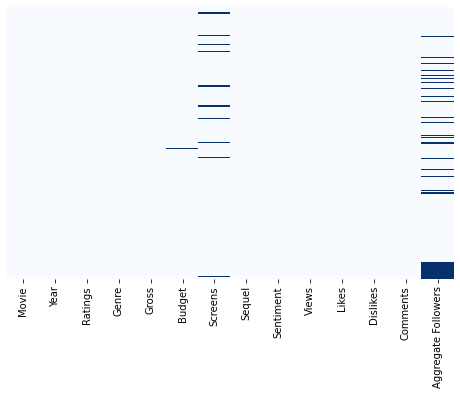

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
sb.heatmap(sub1.isna(), cmap="Blues", cbar=False, yticklabels=False)

In [ ]:
# In ra các dòng chứa dữ liệu thiếu
null_sub1 = sub1[sub1.isna().any(axis=1)]
null_sub1

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
5,A Long Way Off,2014,4.6,3,29000,5.000000e+05,NaN,1,0,91137,112,7,1,310000.0
24,Camp X-Ray,2014,7.0,3,9840,1.000000e+06,NaN,1,3,7128,1,0,0,2182.0
25,Cantinflas,2014,6.7,9,6370000,3.000000e+06,382.0,1,3,2902492,9522,558,2296,NaN
32,Dracula Untold,2014,6.3,1,55900000,7.000000e+07,NaN,1,0,9149892,26427,1342,5278,395500.0
38,Falcon Rising,2014,5.7,1,8690,4.500000e+06,NaN,1,0,735551,636,98,92,1060000.0
43,God's Pocket,2014,6.1,10,104000,1.000000e+06,3.0,1,0,99427,47,10,12,NaN
48,Heaven Is for Real,2014,5.8,3,91400000,1.200000e+07,2417.0,1,-9,175017,461,34,133,NaN
54,Inherent Vice,2014,6.7,8,8090000,2.000000e+07,645.0,1,1,1167941,2651,82,797,NaN
58,It Follows,2014,6.9,15,14700000,2.000000e+06,4.0,1,-9,4877,6,1,1,NaN
61,John Wick,2014,7.2,1,43000000,2.000000e+07,2589.0,1,0,4846645,14722,405,2732,NaN


In [ ]:
null_sub1.shape

(44, 14)

Vì tập dữ liệu chỉ có 231 dòng, trong đó chứa đến 44 dòng chứa dữ liệu thiếu nên không thể xóa bỏ các dòng này được. Phương án đề ra là tạo giá trị mean của theo các cột để lấp vào các giá trị thiếu này.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
impute = SimpleImputer(missing_values= np.nan, strategy="mean")

impute.fit(sub1[['Budget', 'Screens', 'Aggregate Followers']])
sub1[['Budget', 'Screens', 'Aggregate Followers']] = impute.transform(sub1[['Budget', 'Screens', 'Aggregate Followers']])

In [ ]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                231 non-null    object 
 1   Year                 231 non-null    int64  
 2   Ratings              231 non-null    float64
 3   Genre                231 non-null    int64  
 4   Gross                231 non-null    int64  
 5   Budget               231 non-null    float64
 6   Screens              231 non-null    float64
 7   Sequel               231 non-null    int64  
 8   Sentiment            231 non-null    int64  
 9   Views                231 non-null    int64  
 10  Likes                231 non-null    int64  
 11  Dislikes             231 non-null    int64  
 12  Comments             231 non-null    int64  
 13  Aggregate Followers  231 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.4+ KB


**Mã hóa lại dữ liệu**

>* Chuyển đổi dữ liệu của biến Sentiment(Mức độ tình cảm tích cực hoặc tiêu cực) thành biến định tính: Với giá trị 0 là tiêu cực(Sentiment <= 0), giá trị 1 là tích cực(Sentiment > 0)



In [ ]:
for row in range(len(sub1)):
  if sub1.loc[row, 'Sentiment'] > 0:
    sub1.loc[row,'Sentiment'] = 1
  else:
    sub1.loc[row, 'Sentiment'] = 0

In [ ]:
#Sau khi mã hóa lại dữ liệu Sentiment
sub1.head(10)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.000000,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.000000,2,1,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.000000,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.000000,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.000000,2,0,3145573,12163,610,1082,1923800.0
5,A Long Way Off,2014,4.6,3,29000,500000.0,2209.244344,1,0,91137,112,7,1,310000.0
6,A Million Ways to Die in the West,2014,6.1,8,42600000,40000000.0,3158.000000,1,0,3013011,9595,419,1020,8153000.0
7,A Most Violent Year,2014,7.1,1,5750000,20000000.0,818.000000,1,1,1854103,2207,197,593,130655.0
8,A Walk Among the Tombstones,2014,6.5,10,26000000,28000000.0,2714.000000,1,1,2213659,2210,419,382,125646.0
9,About Last Night,2014,6.1,8,48600000,12500000.0,2253.000000,1,0,5218079,11709,532,770,21697300.0


**Nhóm các giá trị và tạo biến phụ**

>* Từ biến Rattings chúng ta phân loại thành 2 nhóm:<br/>
>>1. Những bộ phim có ratings >=7
>>0. Những bộ phim có ratings < 7
>* Đồng thời tạo một biến phụ RateType để chứa thuộc tính phân loại này

In [ ]:
#Tạo một biến phụ
sub1['RateType'] = 0

In [ ]:
#Phân loại Ratings và lưu vào biến RateType
for row in range(len(sub1)):
  if sub1.loc[row, 'Ratings'] >= 7:
    sub1.loc[row,'RateType'] = 1
  else:
    sub1.loc[row,'RateType'] = 0


*   Từ biến Year chúng ta phân loại thành 2 nhóm:
1.   Những bộ phim có Year = 2014
2.   Những bộ phim có Year = 2015
*    Đồng thời tạo một biến phụ Class_ C để chứa thuộc tính phân loại này


In [ ]:
#Tạo một biến phụ
sub1['Year_C'] = 0

In [ ]:
#Phân loại Year và lưu vào biến Year_C
for row in range(len(sub1)):
  if sub1.loc[row, 'Year'] == 2014:
    sub1.loc[row,'Year_C'] = 0
  else:
    sub1.loc[row,'Year_C'] = 1

In [ ]:
sub1.head(10)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,RateType,Year_C
0,13 Sins,2014,6.3,8,9130,4000000.0,45.000000,1,0,3280543,4632,425,636,1120000.0,0,0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.000000,2,1,583289,3465,61,186,12350000.0,1,0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.000000,1,0,304861,328,34,47,483000.0,0,0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.000000,2,0,452917,2429,132,590,568000.0,0,0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.000000,2,0,3145573,12163,610,1082,1923800.0,0,0
5,A Long Way Off,2014,4.6,3,29000,500000.0,2209.244344,1,0,91137,112,7,1,310000.0,0,0
6,A Million Ways to Die in the West,2014,6.1,8,42600000,40000000.0,3158.000000,1,0,3013011,9595,419,1020,8153000.0,0,0
7,A Most Violent Year,2014,7.1,1,5750000,20000000.0,818.000000,1,1,1854103,2207,197,593,130655.0,1,0
8,A Walk Among the Tombstones,2014,6.5,10,26000000,28000000.0,2714.000000,1,1,2213659,2210,419,382,125646.0,0,0
9,About Last Night,2014,6.1,8,48600000,12500000.0,2253.000000,1,0,5218079,11709,532,770,21697300.0,0,0


###CHƯƠNG 3: Kiểm định giả thuyết


In [ ]:
# CHƯƠNG 3: Kiểm định giả thuyết
# Phân tích phương sai ANOVA
# Phân tích Chi - square
# Tương quan Pearson

Text(0.5, 1.0, 'Scatterplot cho mối liên hệ giữa bình chọn và doanh thu')

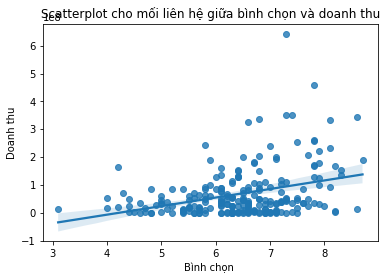

In [ ]:
# Tương quan Pearson
scat1 = sb.regplot(x="Ratings", y="Gross", data=data)
plt.xlabel('Bình chọn ')
plt.ylabel('Doanh thu')
plt.title('Scatterplot cho mối liên hệ giữa bình chọn và doanh thu')

In [ ]:
print("mối liên hệ")
print(st.pearsonr(sub1['Ratings'], sub1['Gross']))

mối liên hệ
(0.3422040512817663, 9.566423476558037e-08)


In [ ]:
# Phân tích Chi - square
ct1 = pd.crosstab(sub1['Genre'], sub1['Ratings'])
print (ct1)

Ratings  3.1  4.0  4.2  4.3  4.4  4.5  4.6  ...  7.9  8.0  8.1  8.2  8.3  8.6  8.7
Genre                                       ...                                   
1          1    1    1    1    0    0    0  ...    1    0    2    0    1    0    0
2          0    0    0    0    0    0    0  ...    0    0    0    0    0    0    1
3          0    0    1    0    1    0    1  ...    1    1    0    1    0    1    0
4          0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
6          0    0    0    0    0    0    1  ...    0    0    0    0    0    0    0
7          0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
8          0    0    0    0    0    0    0  ...    0    0    0    2    0    0    0
9          0    0    0    0    0    0    0  ...    0    0    1    0    1    0    0
10         0    0    0    0    0    0    0  ...    1    0    0    0    0    0    0
12         0    0    0    0    0    0    0  ...    2    0    0    0    0    1    0
15  

In [ ]:
colsum = ct1.sum(axis = 0)
colpct = ct1/colsum
print (colpct)

Ratings  3.1  4.0  4.2  4.3       4.4  ...       8.1       8.2  8.3  8.6  8.7
Genre                                  ...                                   
1        1.0  0.5  0.5  1.0  0.000000  ...  0.666667  0.000000  0.5  0.0  0.0
2        0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.000000  0.0  0.0  1.0
3        0.0  0.0  0.5  0.0  0.333333  ...  0.000000  0.333333  0.0  0.5  0.0
4        0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.000000  0.0  0.0  0.0
6        0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.000000  0.0  0.0  0.0
7        0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.000000  0.0  0.0  0.0
8        0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.666667  0.0  0.0  0.0
9        0.0  0.0  0.0  0.0  0.000000  ...  0.333333  0.000000  0.5  0.0  0.0
10       0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.000000  0.0  0.0  0.0
12       0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.000000  0.0  0.5  0.0
15       0.0  0.5  0.0  0.0  0.666667  ...  0.000000  0.000000  

In [ ]:
print ("chi - square, giá trị p, các số đếm mong đợi")
cs1 = st.chi2_contingency(ct1)
print (cs1)

chi - square, giá trị p, các số đếm mong đợi
(573.0722334221066, 1.8803955657457512e-05, 440, array([[0.28138528, 0.56277056, 0.56277056, 0.28138528, 0.84415584,
        0.28138528, 0.56277056, 0.56277056, 0.84415584, 0.28138528,
        1.40692641, 0.56277056, 0.84415584, 1.96969697, 1.68831169,
        1.40692641, 1.68831169, 2.25108225, 1.12554113, 0.56277056,
        3.93939394, 1.96969697, 3.93939394, 2.81385281, 2.81385281,
        3.93939394, 2.25108225, 3.0952381 , 2.25108225, 1.96969697,
        2.53246753, 1.96969697, 2.25108225, 0.84415584, 1.40692641,
        0.84415584, 0.84415584, 1.96969697, 1.40692641, 0.28138528,
        0.84415584, 0.84415584, 0.56277056, 0.56277056, 0.28138528],
       [0.05194805, 0.1038961 , 0.1038961 , 0.05194805, 0.15584416,
        0.05194805, 0.1038961 , 0.1038961 , 0.15584416, 0.05194805,
        0.25974026, 0.1038961 , 0.15584416, 0.36363636, 0.31168831,
        0.25974026, 0.31168831, 0.41558442, 0.20779221, 0.1038961 ,
        0.72727273, 0

Text(16.299999999999997, 0.5, 'Lượng bình chọn')

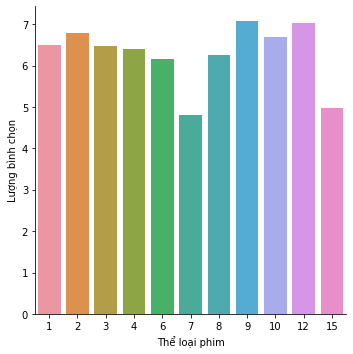

In [ ]:
sb.catplot(x='Genre', y='Ratings', data=sub1, kind='bar', ci=None)
plt.xlabel('Thể loại phim')
plt.ylabel('Lượng bình chọn')

In [ ]:
# Phân tích ANOVA: biến giải thích nhiều hơn 2 loại

In [ ]:
ct1 = sub1.groupby('Gross').size()
print (ct1)

Gross
2470         1
4240         1
5000         1
8300         1
8690         1
            ..
337000000    1
345000000    1
350000000    2
458000000    1
643000000    1
Length: 215, dtype: int64


In [ ]:
model1 = smf.ols(formula='Gross ~ C(Genre)', data = sub1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     6.093
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.53e-08
Time:                        10:01:31   Log-Likelihood:                -4527.0
No. Observations:                 231   AIC:                             9076.
Df Residuals:                     220   BIC:                             9114.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.145e+08   9.98e+06     11.

In [ ]:
sub2 = sub1[['Gross', 'Genre']].dropna()

In [ ]:
print('trung bình cho doanh thu bởi thể loại phim')
m1= sub2.groupby('Genre').mean()
print (m1)

trung bình cho doanh thu bởi thể loại phim
              Gross
Genre              
1      1.144953e+08
2      1.240408e+08
3      3.147542e+07
4      1.210000e+06
6      2.532667e+07
7      3.355000e+03
8      4.353090e+07
9      4.515669e+07
10     2.369450e+07
12     1.347615e+08
15     2.935600e+07


In [ ]:
print('độ lệch chuẩn cho doanh thu bởi thể loại phim')
sd1 = sub2.groupby('Genre').std()
print(sd1)

độ lệch chuẩn cho doanh thu bởi thể loại phim
              Gross
Genre              
1      1.217730e+08
2      9.861645e+07
3      4.517083e+07
4               NaN
6      1.675948e+07
7      1.251579e+03
8      5.173317e+07
9      4.530539e+07
10     1.768948e+07
12     9.103953e+07
15     2.538672e+07


In [ ]:
# Phân tích sâu

In [ ]:
mc1 = multi.MultiComparison(sub2['Gross'], sub2['Genre'])

In [ ]:
res1 = mc1.tukeyhsd()

In [ ]:
print(res1.summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower          upper      reject
--------------------------------------------------------------------------
     1      2    9545484.2564    0.9  -72669845.7282   91760814.241  False
     1      3  -83019924.2943  0.001 -133437346.6607 -32602501.9279   True
     1      4 -113285349.0769    0.9 -376961003.4281 150390305.2742  False
     1      6  -89168682.4103 0.7042 -243691242.0955   65353877.275  False
     1      7 -114491994.0769 0.6395  -302346003.252  73362015.0981  False
     1      8  -70964446.6695  0.001  -119145319.742 -22783573.5971   True
     1      9  -69338656.7692 0.1512 -148839857.8451  10162544.3066  False
     1     10  -90800849.0769 0.0173 -173016179.0615  -8585519.0923   True
     1     12   20266189.3846    0.9  -59235011.6912  99767390.4605  False
     1     15  -85139349.0769 0.0742 -174024394.0262   3745695.8723  False
     2      3  -92565408.

In [ ]:
# Phân tích ANOVA

In [ ]:
ct2 = sub1.groupby('Gross').size()
print (ct2)

Gross
2470         1
4240         1
5000         1
8300         1
8690         1
            ..
337000000    1
345000000    1
350000000    2
458000000    1
643000000    1
Length: 215, dtype: int64


In [ ]:
model2 = smf.ols(formula='Gross ~ C(Year)', data = sub1)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.499
Date:                Thu, 04 Nov 2021   Prob (F-statistic):             0.0627
Time:                        10:01:56   Log-Likelihood:                -4553.5
No. Observations:                 231   AIC:                             9111.
Df Residuals:                     229   BIC:                             9118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.104e+07   6.93e+06     

In [ ]:
sub3 = data[['Gross', 'Year']].dropna()

In [ ]:
print('trung bình cho doanh thu bởi năm sản xuất')
m2= sub3.groupby('Year').mean()
print (m2)

trung bình cho doanh thu bởi năm sản xuất
             Gross
Year              
2014  6.103726e+07
2015  8.491441e+07


In [ ]:
print('độ lệch chuẩn cho doanh thu bởi năm sản xuất')
sd2 = sub3.groupby('Year').std()
print(sd2)

độ lệch chuẩn cho doanh thu bởi năm sản xuất
             Gross
Year              
2014  7.467896e+07
2015  1.150623e+08


CHƯƠNG 4: Phân tích các hồi quy

Text(0.5, 1.0, 'Scatterplot cho mối liên hệ giữa bình chọn và doanh thu')

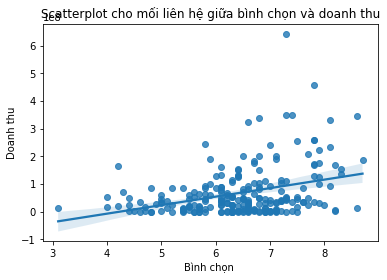

In [ ]:
# Hồi quy tuyến tính giữa 2 biến định lượng 
scat1 = sb.regplot(x="Ratings", y="Gross", data=data)
plt.xlabel('Bình chọn ')
plt.ylabel('Doanh thu')
plt.title('Scatterplot cho mối liên hệ giữa bình chọn và doanh thu')

In [ ]:
reg1 = smf.ols('Ratings ~ Gross', data = sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     30.37
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           9.57e-08
Time:                        10:02:13   Log-Likelihood:                -310.28
No. Observations:                 231   AIC:                             624.6
Df Residuals:                     229   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1825      0.077     80.067      0.0

Text(0.5, 1.0, 'Scatterplot cho mối liên hệ giữa năm và doanh thu')

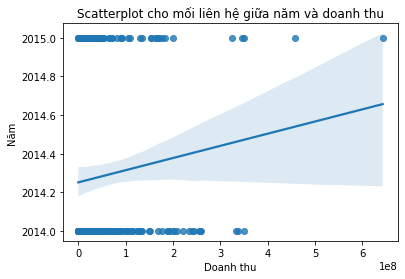

In [ ]:
# Hồi quy tuyến tính giữa biến định lượng và phân loại
scat2 = sb.regplot(x="Gross", y="Year", data = sub1)
plt.xlabel('Doanh thu')
plt.ylabel('Năm')
plt.title('Scatterplot cho mối liên hệ giữa năm và doanh thu')

In [ ]:
reg2 = smf.ols('Gross ~ Year', data = sub1).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.499
Date:                Thu, 04 Nov 2021   Prob (F-statistic):             0.0627
Time:                        10:02:21   Log-Likelihood:                -4553.5
No. Observations:                 231   AIC:                             9111.
Df Residuals:                     229   BIC:                             9118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.803e+10   2.57e+10     -1.868      0.0

In [ ]:
sub4 = data[['Gross', 'Year']].dropna()

In [ ]:
print ("Trung bình")
ds1 = sub4.groupby('Gross').mean()
print (ds1)
print ("Độ lệch chuẩn")
ds2 = sub4.groupby('Gross').std()
print (ds2)

Trung bình
             Year
Gross            
2470       2014.0
4240       2014.0
5000       2014.0
8300       2014.0
8690       2014.0
...           ...
337000000  2014.0
345000000  2015.0
350000000  2014.5
458000000  2015.0
643000000  2015.0

[215 rows x 1 columns]
Độ lệch chuẩn
               Year
Gross              
2470            NaN
4240            NaN
5000            NaN
8300            NaN
8690            NaN
...             ...
337000000       NaN
345000000       NaN
350000000  0.707107
458000000       NaN
643000000       NaN

[215 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(16.299999999999997, 0.5, 'Tổng doanh thu ')

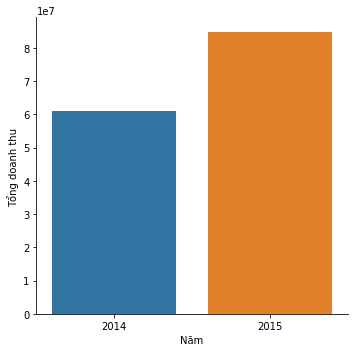

In [ ]:
sb.factorplot(x="Year", y="Gross", data = sub1, kind="bar", ci=None)
plt.xlabel('Năm')
plt.ylabel('Tổng doanh thu ')

In [ ]:
# Hồi quy đa biến
print('Canh chuẩn cho Screens')
sub1['Screens_c'] = sub1['Screens'] - sub1['Screens'].mean()
print(sub1['Screens_c'])

Canh chuẩn cho Screens
0     -2.164244e+03
1      1.096756e+03
2      6.627557e+02
3      1.260756e+03
4      1.007557e+02
           ...     
226   -2.143244e+03
227    6.057557e+02
228    5.677557e+02
229    4.547474e-13
230    5.107557e+02
Name: Screens_c, Length: 231, dtype: float64


In [ ]:
print('Canh chuẩn cho Likes')
sub1['Likes_c'] = sub1['Likes'] - sub1['Likes'].mean()
print(sub1['Likes_c'])

Canh chuẩn cho Likes
0      -8100.536797
1      -9267.536797
2     -12404.536797
3     -10303.536797
4       -569.536797
           ...     
226    -3407.536797
227     6070.463203
228    -5909.536797
229   -12332.536797
230    -9891.536797
Name: Likes_c, Length: 231, dtype: float64


In [ ]:
print('Canh chuẩn cho Dislikes')
sub1['Dislikes_c'] = sub1['Dislikes'] - sub1['Dislikes'].mean()
print(sub1['Dislikes_c'])


Canh chuẩn cho Dislikes
0     -254.051948
1     -618.051948
2     -645.051948
3     -547.051948
4      -69.051948
          ...    
226    -38.051948
227    448.948052
228   -354.051948
229   -612.051948
230   -248.051948
Name: Dislikes_c, Length: 231, dtype: float64


In [ ]:
reg15 = smf.ols('Gross ~ Ratings + Screens_c + Likes_c + Dislikes_c ', data=sub1).fit()
print(reg15.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     44.36
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.84e-27
Time:                        10:02:57   Log-Likelihood:                -4488.3
No. Observations:                 231   AIC:                             8987.
Df Residuals:                     226   BIC:                             9004.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.26e+08   3.04e+07     -4.150      0.0

In [ ]:
# Hồi quy đa thức
sub5 = sub1[['Gross', 'Ratings']].dropna()


Text(0, 0.5, 'Lượng bình chọn')

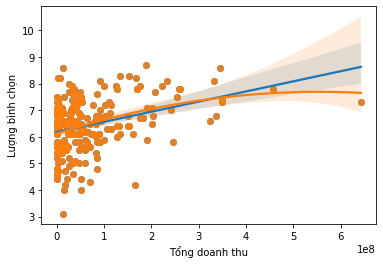

In [ ]:
scat1 = sb.regplot(x="Gross", y="Ratings", scatter=True, data=sub5)
scat1 = sb.regplot(x="Gross", y="Ratings", scatter=True, order=2, data=sub5)
plt.xlabel('Tổng doanh thu')
plt.ylabel('Lượng bình chọn')

In [ ]:
print('Canh chuẩn cho Ratings')
sub1['Ratings_c'] = sub1['Ratings'] - sub1['Ratings'].mean()
print(sub1['Ratings_c'])

Canh chuẩn cho Ratings
0     -0.141558
1      0.658442
2     -0.241558
3     -0.141558
4     -1.741558
         ...   
226   -0.041558
227   -0.941558
228   -1.041558
229   -1.041558
230   -2.041558
Name: Ratings_c, Length: 231, dtype: float64


In [ ]:
reg5 = smf.ols('Gross ~ Ratings_c', data = sub1).fit()
print (reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     30.37
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           9.57e-08
Time:                        10:03:10   Log-Likelihood:                -4540.9
No. Observations:                 231   AIC:                             9086.
Df Residuals:                     229   BIC:                             9093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.807e+07   5.51e+06     12.357      0.0

In [ ]:
reg5 = smf.ols('Gross ~ Ratings_c + I(Ratings_c**2)', data = sub1).fit()
print (reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     19.08
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           2.18e-08
Time:                        10:03:13   Log-Likelihood:                -4537.4
No. Observations:                 231   AIC:                             9081.
Df Residuals:                     228   BIC:                             9091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.794e+07   6.65e+0

In [ ]:
# Hồi quy Logistic (đơn biến)

lreg1 = smf.logit (formula = 'RateType ~ Sentiment', data = sub1).fit()
print(lreg1.summary()) 

Optimization terminated successfully.
         Current function value: 0.581208
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RateType   No. Observations:                  231
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                 0.04682
Time:                        10:03:19   Log-Likelihood:                -134.26
converged:                       True   LL-Null:                       -140.85
Covariance Type:            nonrobust   LLR p-value:                 0.0002813
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4289      0.232     -6.155      0.000      -1.884      -0.974
Sentiment      1.0678      0.

In [ ]:
print('ODD')
print(np.exp(lreg1.params))

ODD
Intercept    0.239583
Sentiment    2.909091
dtype: float64


In [ ]:
conf = lreg1.conf_int()
conf['ODD'] = lreg1.params
conf.columns = ['Lower CI', 'Upper CI', 'ODD']
print (np.exp(conf))

           Lower CI  Upper CI       ODD
Intercept  0.152001  0.377629  0.239583
Sentiment  1.611702  5.250852  2.909091


In [ ]:
# Hồi quy Logistic (đa biến)

lreg2 = smf.logit (formula = 'RateType ~ Sentiment + Year_C', data = sub1).fit()
print(lreg2.summary()) 

Optimization terminated successfully.
         Current function value: 0.580841
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RateType   No. Observations:                  231
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                            2
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                 0.04743
Time:                        10:03:26   Log-Likelihood:                -134.17
converged:                       True   LL-Null:                       -140.85
Covariance Type:            nonrobust   LLR p-value:                  0.001255
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4098      0.236     -5.963      0.000      -1.873      -0.946
Sentiment      1.1113      0.

###**Chương 5: Cây quyết định**

In [ ]:
sub1.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,RateType,Year_C,Screens_c,Likes_c,Dislikes_c,Ratings_c
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0,0,0,-2164.244344,-8100.536797,-254.051948,-0.141558
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,1,583289,3465,61,186,12350000.0,1,0,1096.755656,-9267.536797,-618.051948,0.658442
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0,0,0,662.755656,-12404.536797,-645.051948,-0.241558
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0,0,0,1260.755656,-10303.536797,-547.051948,-0.141558
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0,0,0,100.755656,-569.536797,-69.051948,-1.741558


In [ ]:
#Chọn ra các biến có thể ảnh hưởng đến Sentiment để training mô hình
feartures = ['Ratings', 'Gross', 'Genre','Views', 'Likes', 'Dislikes','Budget', 'Screens', 'Sequel', 'Comments', 'Aggregate Followers']

In [ ]:
X = sub1[feartures].iloc[:,:]
X

,Ratings,Gross,Genre,Views,Likes,Dislikes,Budget,Screens,Sequel,Comments,Aggregate Followers
0,6.3,9130,8,3280543,4632,425,4000000.0,45.000000,1,636,1.120000e+06
1,7.1,192000000,1,583289,3465,61,50000000.0,3306.000000,2,186,1.235000e+07
2,6.2,30700000,1,304861,328,34,28000000.0,2872.000000,1,47,4.830000e+05
3,6.3,106000000,1,452917,2429,132,110000000.0,3470.000000,2,590,5.680000e+05
4,4.7,17300000,8,3145573,12163,610,3500000.0,2310.000000,2,1082,1.923800e+06
...,...,...,...,...,...,...,...,...,...,...,...
226,6.4,1210000,4,3701061,9325,641,50000000.0,66.000000,1,1859,3.038193e+06
227,5.5,21000000,15,7119456,18803,1128,37000000.0,2815.000000,1,2290,3.038193e+06
228,5.4,10200000,8,3450614,6823,325,35000000.0,2777.000000,1,409,3.038193e+06
229,5.4,12300000,1,66872,400,67,3000000.0,2209.244344,1,201,3.038193e+06


In [ ]:
y = sub1['Sentiment']
y

0      0
1      1
2      0
3      0
4      0
      ..
226    1
227    1
228    1
229    1
230    0
Name: Sentiment, Length: 231, dtype: int64

In [ ]:
#Tạo tập test và tập train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_train.shape

(184, 11)

In [ ]:
X_test.shape

(47, 11)

Tập ban đầu đã được chia thành 2 tập train chiếm 80% và tập test chiếm 20%

In [ ]:
X_train.head()

,Ratings,Gross,Genre,Views,Likes,Dislikes,Budget,Screens,Sequel,Comments,Aggregate Followers
181,6.8,89400000,1,84870,265,13,155000000.0,3758.0,5,63,3.877901e+06
218,7.7,49500000,1,11476882,40496,1383,30000000.0,2772.0,1,4435,3.038193e+06
123,7.4,2720000,3,1303646,3306,211,20000000.0,461.0,1,564,7.598000e+05
15,6.6,11800,8,3915978,6983,247,6000000.0,18.0,1,460,2.530000e+05
88,6.8,83300000,12,1223790,2934,123,132000000.0,32.0,1,226,4.720000e+04


In [ ]:
y_train.head()

181    0
218    1
123    0
15     1
88     1
Name: Sentiment, dtype: int64

In [ ]:
dt_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=20)

In [ ]:
#Fit model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Dự đoán thử tập test cho ra mức độ chính xác của mô hình trên là như thế nào
y_pred = dt_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1])

In [ ]:
y_test.values

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1])

In [ ]:
metrics.accuracy_score(y_test, y_pred)

NameError: ignored

In [ ]:
#Xuất mô hình đã huấn luyện ở định dạng mà graphviz có thể đọc được
dot_data = tree.export_graphviz(dt_model, out_file=None, filled=True, rounded=True, feature_names=feartures[:], proportion=True, class_names=['Not defaulted', 'Defaulted'])

Trong đó:
filed=True: mỗi node sẽ được tô màu
<br/>rounded=True: các node đc hiện thị dưới dạng chữ nhật có co góc tròn
<br/>proportion=True: tỷ lệ mỗi mẫu trong mỗi node sẽ đc hiển thị

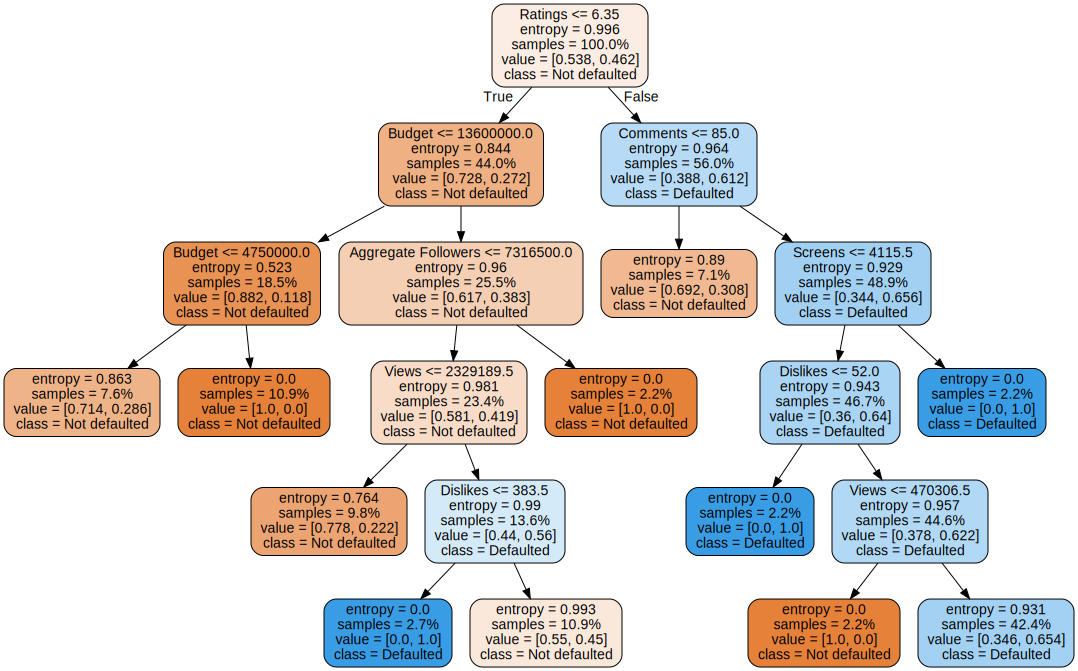

In [ ]:
#Sử dụng phương thức .Source của graphviz để tạo hình ảnh từ dot_data
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Đưa vào một mẫu thử xem mô hình sẽ cho ra kết quả gì
dt_model.predict([[7,100000000, 2, 4000000,50000, 20000, 145000000, 2000, 1, 3000, 200000]])

array([1])